In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import zipfile as zf

# Study data files
hurricane_path = "../Resources/landfall.csv"
#sst_at_path = "C:/Users/spearjen/Desktop/unzipped/df2001_2004.csv"

# Read the hurricane and sst + at data
hurricane_data = pd.read_csv(hurricane_path)
#sst_at_data = pd.read_csv(sst_at_path)


In [3]:
hurricane_data.head()

,ID,Name,Year,Month,Day,Status,Wind_mph,Latitude,Longitude
0,AL011851,UNNAMED,1851,6,25,HU,80,28.2,-96.8
1,AL041851,UNNAMED,1851,8,23,HU,100,30.1,-85.7
2,AL061851,UNNAMED,1851,10,19,TS,50,41.1,-71.7
3,AL011852,UNNAMED,1852,8,26,HU,100,30.2,-88.6
4,AL031852,UNNAMED,1852,9,12,HU,70,28.0,-82.8


In [7]:
# #filter to just landfall
hurricane_landfall = hurricane_data

    
index = hurricane_landfall.index
number_of_rows = len(index)
number_of_rows

962

In [11]:
# #format date
# hurricane_landfall['Year'] = pd.to_datetime(hurricane_landfall['Date'], format='%Y%m%d')
# hurricane_landfall.head()

In [12]:
# hurricane_landfall['Year'] = pd.DatetimeIndex(hurricane_landfall['Date']).year
# hurricane_landfall['Month'] = pd.DatetimeIndex(hurricane_landfall['Date']).month
# hurricane_landfall['Day'] = pd.DatetimeIndex(hurricane_landfall['Date']).day
# hurricane_landfall.head()

In [13]:
#Groupby year count
gb_hurricane_landfall = hurricane_data.groupby("Year").agg({'Status':['count']})
gb_hurricane_landfall

,Status
,count
Year,
1851,3
1852,3
1854,3
1855,1
1856,3
...,...
2015,5
2016,14


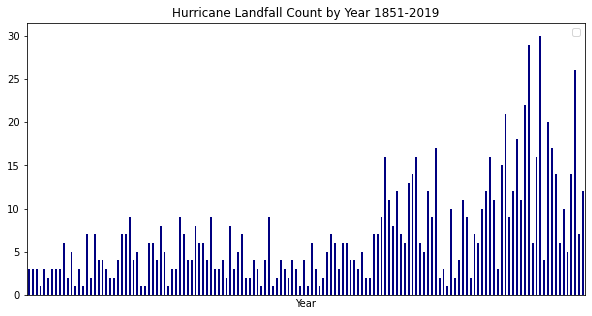

In [27]:
gb_hurricane_landfall.plot.bar(figsize=(10,5), color = "navy")
plt.legend("")
plt.title("Hurricane Landfall Count by Year 1851-2019")
plt.xticks([])
plt.savefig("landfall_count_by_year")

In [28]:
#Groupby year median windspeed
gb_hurricane_windspeed = hurricane_data.groupby("Year").agg({'Wind_mph':['median']})
gb_hurricane_windspeed

,Wind_mph
,median
Year,
1851,80.0
1852,90.0
1854,90.0
1855,110.0
1856,90.0
...,...
2015,110.0
2016,72.5


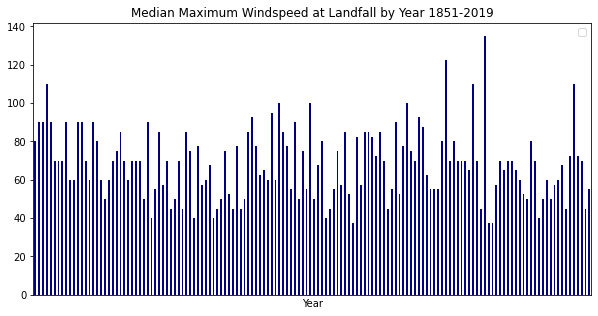

In [29]:
gb_hurricane_windspeed.plot.bar(figsize=(10,5), color = "navy")
plt.legend("")
plt.title("Median Maximum Windspeed at Landfall by Year 1851-2019")
plt.xticks([])
plt.savefig("windspeed_med_by_year")

In [98]:
sst_at_data.head()
sst_at_data_drop=sst_at_data.dropna()
sst_at_data_drop

,latitude,longitude,year,month,day,air_temperature,sea_surface_temp
0,34.3,-76.9,2001,3,17,15.8,17.8
1,17.7,-65.2,2001,3,11,25.7,26.3
2,30.9,-78.1,2001,3,20,17.8,16.0
3,17.3,-66.0,2001,3,1,25.8,26.6
4,18.3,-65.1,2001,3,11,24.0,26.5
...,...,...,...,...,...,...,...
8242501,43.6,-70.1,2003,12,11,8.9,5.9
8242502,43.6,-70.1,2003,12,10,-0.1,5.8
8242503,43.6,-70.1,2003,12,12,5.9,6.3
8242504,43.6,-70.1,2003,12,11,6.3,5.7


In [106]:
#Groupby year median air temp 
gb_air_temp = sst_at_data_drop.groupby(["year","latitude","longitude"]).agg({'air_temperature':['median']})
gb_air_temp


air_temperature
                                 median
year latitude longitude                
2001 15.70    -98.90              28.25
              -98.70              30.50
              -98.60              28.20
              -98.50              29.85
              -98.40              27.50
...                                 ...
2004 47.20    -59.30              16.90
              -59.20              17.90
              -59.10               1.40
     47.26    -60.32              18.90
     47.27    -59.79               6.50

[121069 rows x 1 columns]

In [107]:
#Groupby year median sst
gb_sst = sst_at_data_drop.groupby(["year","latitude","longitude"]).agg({'sea_surface_temp':['median']})
gb_sst

sea_surface_temp
                                  median
year latitude longitude                 
2001 15.70    -98.90                28.3
              -98.70                32.0
              -98.60                29.8
              -98.50                28.9
              -98.40                28.0
...                                  ...
2004 47.20    -59.30                13.0
              -59.20                16.0
              -59.10                 8.0
     47.26    -60.32                18.7
     47.27    -59.79                 8.7

[121069 rows x 1 columns]

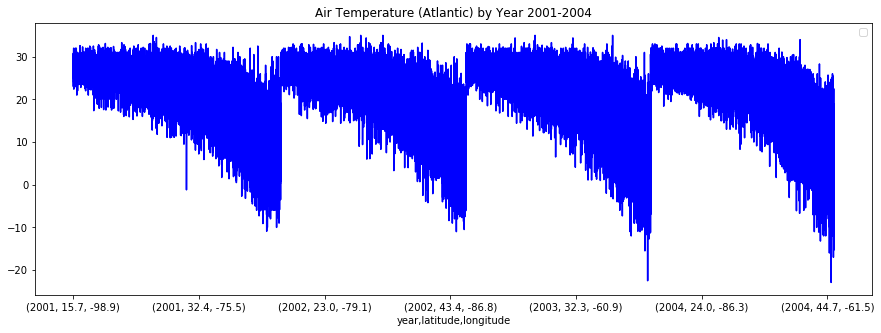

In [110]:
gb_air_temp.plot.line(figsize=(15,5), color = "blue")
plt.legend("")
plt.title("Air Temperature (Atlantic) by Year 2001-2004")
plt.savefig("air_temp_med_by_year")

In [ ]:
gb_sst.plot.line(figsize=(15,5), color = "blue")
plt.legend("")
plt.title("Air Temperature (Atlantic) by Year 2001-2004")
plt.savefig("air_temp_med_by_year")